import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [7]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/57

make measure image

In [8]:
def_img = io.imread("image\\10.22.2020 Heptane-40%water60%ethanol\\frame 4\\3-40-47 PM\\10.22.2020 (4) 1378.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

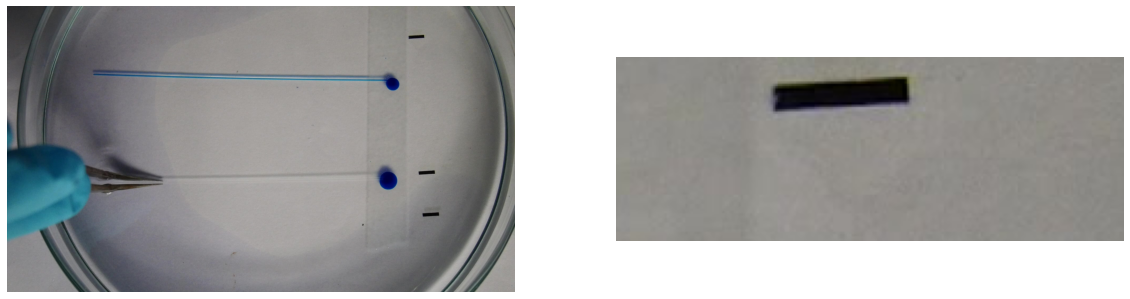

In [9]:
measure_im = crop(def_img, ((100, 900), (1450, 250), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

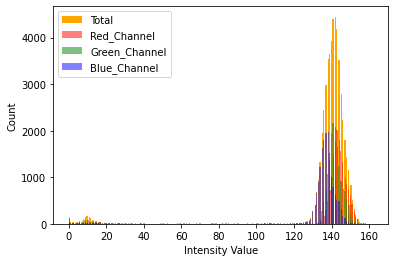

In [10]:
plot_histogram(measure_im)

[20, 69]
[17, 126]


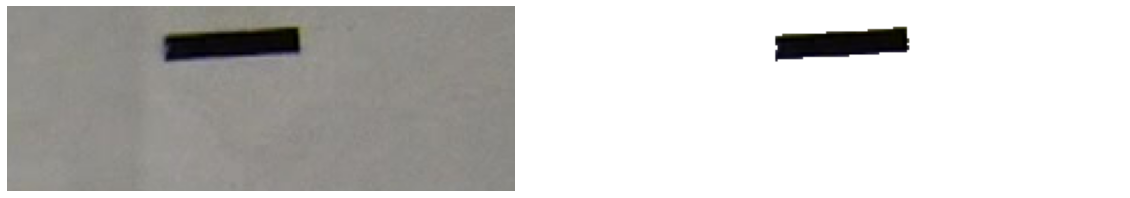

length of picture is  57.07889277132134 pixel


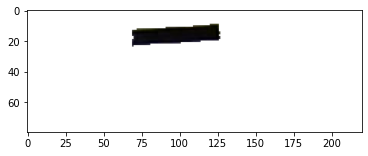

In [11]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

57 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 57


find definition length on first picture

(1080, 1920, 3) (270, 930, 3)


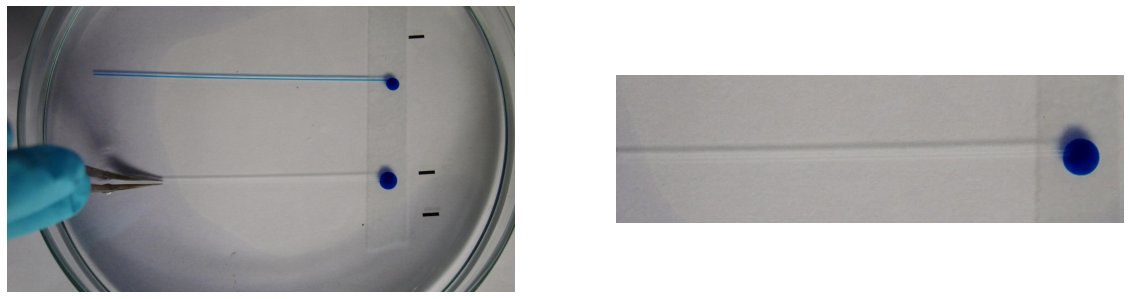

In [12]:
def_crop_im = crop(def_img, ((510, 300), (590, 400), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

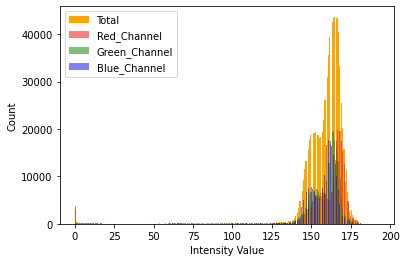

In [13]:
plot_histogram(def_crop_im)

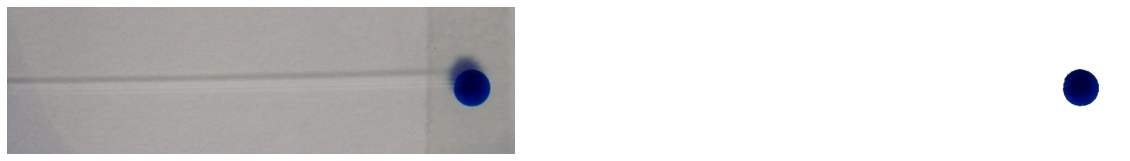

In [14]:
Tdef_img2 = thresholding(30,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[152, 818]
[150, 883]
ldef  65.03076195155643 pixel


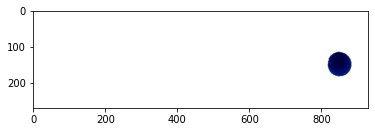

In [15]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 1378 to 1449

In [16]:
number_of_picture = 1378
thresh = 45
template1 = []
l_def = 65.03076195155643
#1449-1378 = 71
for i in range(72):  
    image = mpimg.imread( "image\\10.22.2020 Heptane-40%water60%ethanol\\frame 4\\3-40-47 PM\\10.22.2020 (4) " + str(number_of_picture + i).zfill(4) + ".jpg" )
    crop_image = crop(image, ((510, 300), (590, 400), (0,0)), copy=False)
    thresh_image = thresholding(thresh,crop_image)
    # plot_compare_img(crop_image,thresh_image)
    length = find_length(thresh_image,False)
    length = length - l_def
    length = int(length)
    template1.append(length)
    # print(i, length)
    # plt.figure()
    # plt.imshow(thresh_image)
    # for i in range(len(template1)/2):
    #     if(template1[i] > 70):


In [17]:
print(template1)
print(len(template1))

[0, 1, 4, 6, 8, 8, 8, 11, 15, 16, 18, 20, 23, 26, 28, 30, 32, 33, 36, 38, 40, 42, 44, 46, 48, 49, 51, 53, 56, 58, 59, 62, 63, 65, 67, 69, 71, 73, 74, 76, 80, 80, 82, 84, 86, 88, 88, 90, 91, 96, 95, 96, 98, 100, 103, 105, 107, 108, 110, 111, 114, 116, 117, 119, 121, 121, 123, 124, 127, 127, 130, 131]
72


find length on crop value 2 from 1450 to 4008

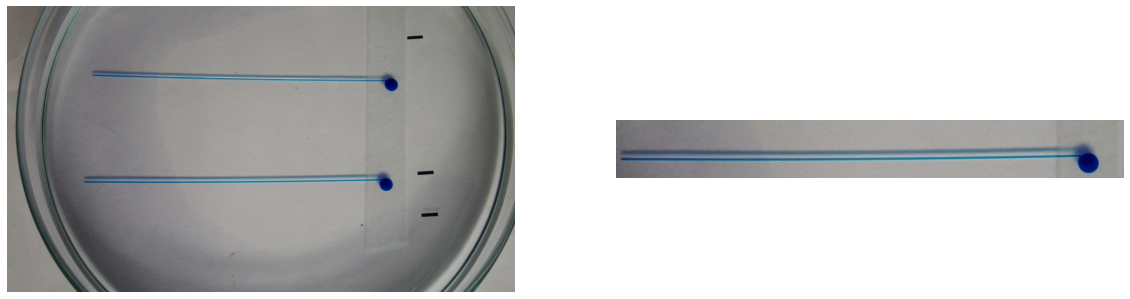

In [40]:
image = mpimg.imread( "image\\10.22.2020 Heptane-40%water60%ethanol\\frame 4\\3-40-47 PM\\10.22.2020 (4) " + str(4008).zfill(4) + ".jpg" )
crop_image = crop(image, ((570, 370), (280, 400), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [41]:
number_of_picture = 1450
thresh = 40
template2 = []
l_def = 65.03076195155643
#4008-1450 = 2558
for i in range(2559):
    image = mpimg.imread( "image\\10.22.2020 Heptane-40%water60%ethanol\\frame 4\\3-40-47 PM\\10.22.2020 (4) " + str(number_of_picture + i).zfill(4) + ".jpg" )
    crop_image = crop(image, ((570, 370), (280, 400), (0,0)), copy=False)
    # if(True):
    thresh_image = thresholding(thresh,crop_image)
    # else:
    #     thresh_image = thresholding(40,crop_image)
    # plot_compare_img(crop_image,thresh_image)
    # print(i)
    length = find_length(thresh_image,False)
    length = length - l_def
    length = int(length)
    template2.append(length)
    # print(i, length)
    # plt.figure()
    # plt.imshow(thresh_image)

In [42]:
print(template2)
print(len(template2))

[132, 134, 135, 136, 138, 142, 142, 144, 144, 147, 149, 147, 149, 155, 154, 156, 161, 159, 158, 163, 165, 166, 167, 170, 172, 170, 173, 173, 172, 175, 175, 179, 183, 183, 184, 186, 188, 191, 191, 191, 195, 195, 197, 199, 199, 203, 203, 204, 207, 207, 207, 210, 213, 213, 211, 215, 219, 220, 222, 223, 223, 224, 227, 229, 230, 231, 232, 234, 234, 238, 238, 239, 238, 241, 244, 246, 247, 248, 248, 250, 251, 253, 254, 254, 255, 258, 259, 263, 264, 264, 265, 267, 269, 269, 271, 272, 274, 275, 276, 276, 278, 281, 282, 283, 284, 285, 286, 288, 290, 291, 293, 294, 295, 296, 297, 298, 299, 301, 302, 304, 302, 306, 308, 309, 311, 312, 313, 314, 316, 318, 318, 319, 321, 322, 323, 325, 325, 327, 328, 327, 329, 332, 334, 334, 334, 336, 337, 338, 339, 341, 343, 344, 345, 347, 348, 350, 350, 352, 353, 354, 356, 356, 358, 358, 360, 362, 363, 364, 366, 364, 367, 368, 368, 369, 371, 373, 374, 375, 376, 376, 377, 379, 382, 381, 382, 384, 386, 386, 388, 389, 389, 391, 391, 394, 395, 394, 397, 397, 397, 399,

concat 2 template and calculate pixel to centimeter

In [43]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [44]:
print(l_array)

[0.000000e+00 8.771930e-03 3.508772e-02 ... 9.640351e+00 9.640351e+00
 9.640351e+00]


export data to exel

In [45]:
import pandas as pd

In [46]:
print(len(l_array))

2631


In [47]:
data = []
num_img = 1378
for i in range(len(l_array)):
    data.append(( " 10.22.2020 (4) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('Heptanewater-40-60(4)_10.22.2020_3-40-47-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


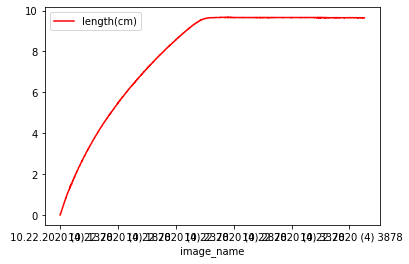

In [48]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()